In [4]:
# Import Tensorflow 2.0
import tensorflow as tf

# MIT introduction to deep learning package
import mitdeeplearning as mdl

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

2024-07-26 21:49:41.412951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import comet_ml
# TODO: ENTER YOUR API KEY HERE!!
COMET_API_KEY = "lVjcBJwWbjcml7h2tIRLfh15Y"

In [6]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="6S191lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : potential_parakeet_5870
COMET INFO:     url                   : https://www.comet.com/tnhi26990/6s191lab2-part1-nn/7925da6755db4f3c8152e94ae243bcb5
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metric

In [7]:
mnist = tf.keras.datasets.mnist
# load the training and testing images and labels from the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
# np.expand_dims(train_images, axis=-1) will add the channel dimension to train_images, then / 255.0 will generate pixel values
# in [0,1]
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
print(train_images.shape)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)


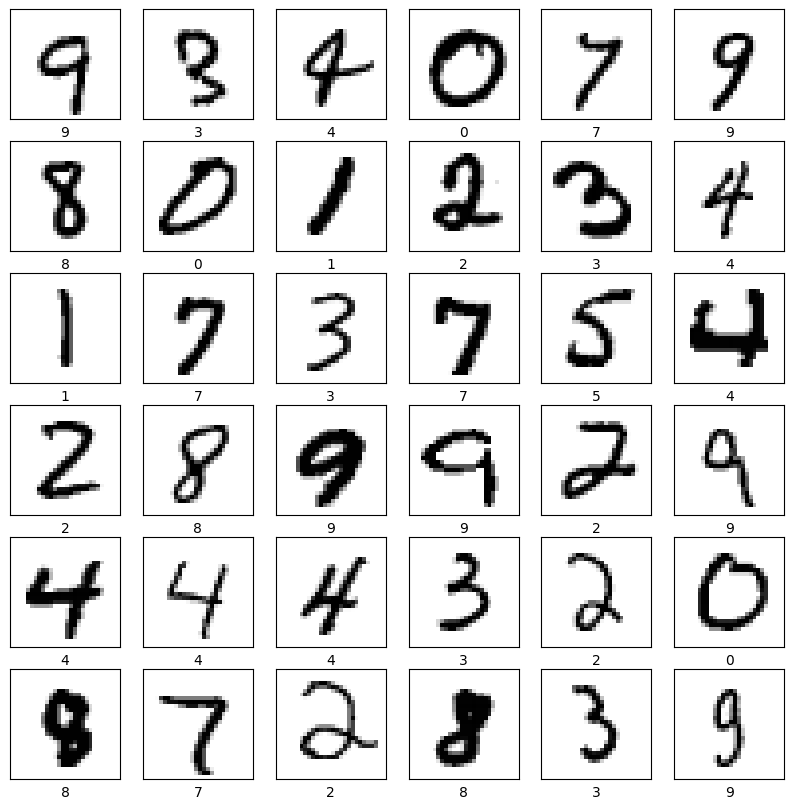

In [21]:
plt.figure(figsize=(10,10)) # create a figure 10 inches tall and 10 inches wide
random_inds = np.random.choice(60000,36) # pick 36 random indices from 0 to 59999
for i in range(36):
    plt.subplot(6,6,i+1) # place each image in a specific position within the 6x6 grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary) # Displays the i-th selected image 
    # using the binary colormap (black and white).
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)

In [9]:
### Build a fully connected model 
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer: transforming the format of the images from a 2d array to a 1d array. 
      # the 1D array = 28 x 28 = 784 pixels
      tf.keras.layers.Flatten(),

      # The first Dense layer will have 128 neurons or nodes and the activation function being used is ReLu
      # We use ReLu because it replaces every negative pixel by 0 
      tf.keras.layers.Dense(128, activation='relu'),

      # The second Dense layer will have 10 neurons or nodes and we use softmax to have an array of probability scores that
      # sum to 1
      tf.keras.layers.Dense(10, activation='softmax')

  ])
  return fc_model

model = build_fc_model()

In [10]:
# loss: defines how we measure how accurate the model is during training
# optimizer: defines how the model is updated based on the data it sees and its loss function
# metrics used to monitor the training and testing steps. In this example, 
# we look at the accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
### Train the model

# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_1.end()

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3697 - accuracy: 0.8970
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1984 - accuracy: 0.9437
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1494 - accuracy: 0.9572
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1206 - accuracy: 0.9655
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1012 - accuracy: 0.9711


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : spontaneous_lungfish_7740
COMET INFO:     url                   : https://www.comet.com/tnhi26990/6s191lab2-part1-nn/2fc621a5e81d4233b2d575742dff123f
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [5]         : (0.8970166444778442, 0.9711166620254517)
COMET INFO:     batch_accuracy [470] : (0.03125, 0.984375)
COMET INFO:     batch_loss [470]     : (0.03963852673768997, 2.423882007598877)
COMET INFO:     epoch_duration [5]   : (2.500261522999608, 3.2199217829997906)
COMET INFO:     loss [5]             : (0.10119092464447021, 0.36974599957466125)
COMET INFO:   Parameters:
COMET INFO:     Optimizer                   : SGD
COMET INFO

In [22]:
### Evaluating accuracy on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
#the accuracy on the test dataset is a little lower than the accuracy on the training dataset. 
#This gap between training accuracy and test accuracy is an example of overfitting, 
#when a machine learning model performs worse on new data than on its training data.

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9686
Test accuracy: 0.9685999751091003


In [25]:
### Build a convolutional neural network

def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # The first convolutional layer, which makes 24 feature maps and the size of the filter is 3x3
        tf.keras.layers.Conv2D(24, kernel_size=(3,3), activation='relu'),

        # The first max pooling layer. The size of the filter is 2x2. 
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # The second convolutional layer makes 36 feature maps and the size of the filter is 3x3
        tf.keras.layers.Conv2D(36, kernel_size=(3,3), activation='relu'),

        # The second max pooling layer. The size of the filter is 2x2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9).
        tf.keras.layers.Flatten(),
                                  
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 321ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [26]:
comet_ml.init(project_name="6.s191lab2_part1_CNN")
comet_model_2 = comet_ml.Experiment()

# Define the compile operation with AdamW optimizer and learning rate of 1e-2
cnn_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-2), loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/tnhi26990/6-s191lab2-part1-cnn/73f8b5a1a70941acba6948cab5f85c86



In [27]:
# Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_2.end() ## uncomment this line to end the comet experiment

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1388 - accuracy: 0.9580
Epoch 2/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0648 - accuracy: 0.9807
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0551 - accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0445 - accuracy: 0.9865


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : historic_chamfer_6036
COMET INFO:     url                   : https://www.comet.com/tnhi26990/6-s191lab2-part1-cnn/73f8b5a1a70941acba6948cab5f85c86
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [5]         : (0.9579833149909973, 0.9865333437919617)
COMET INFO:     batch_accuracy [470] : (0.171875, 1.0)
COMET INFO:     batch_loss [470]     : (0.0028568075504153967, 2.303882598876953)
COMET INFO:     epoch_duration [5]   : (22.721432342999833, 25.462496713999826)
COMET INFO:     loss [5]             : (0.04453963041305542, 0.1388041377067566)
COMET INFO:   Others:
COMET INFO:     trainable_params : 124670
COMET INFO:   Parameters:


In [28]:
# Use the evaluate method to test the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


In [29]:
# Make predictions about test images
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [30]:
# the prediction for the first image in the test dataset
predictions[0]

array([1.3333245e-12, 5.6388372e-10, 1.7306219e-08, 1.4670293e-08,
       2.0458304e-10, 7.6812862e-13, 9.9376288e-17, 1.0000000e+00,
       6.4124339e-10, 3.0106197e-08], dtype=float32)

In [31]:
# identify the digit with the highest confidence prediction for the first image in the test dataset
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


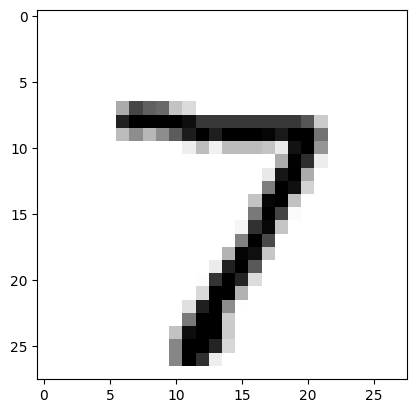

In [32]:
# check the test label to see if this prediction is correct
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
comet_model_2.log_figure(figure=plt)

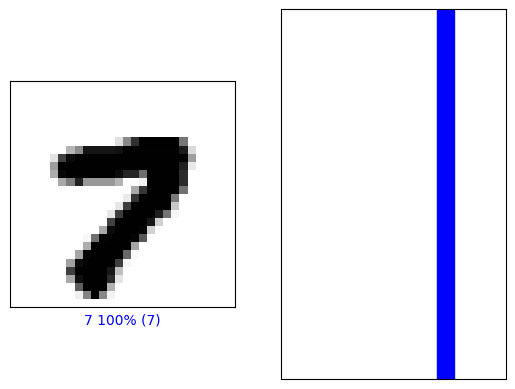

In [33]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)
comet_model_2.log_figure(figure=plt)

60000


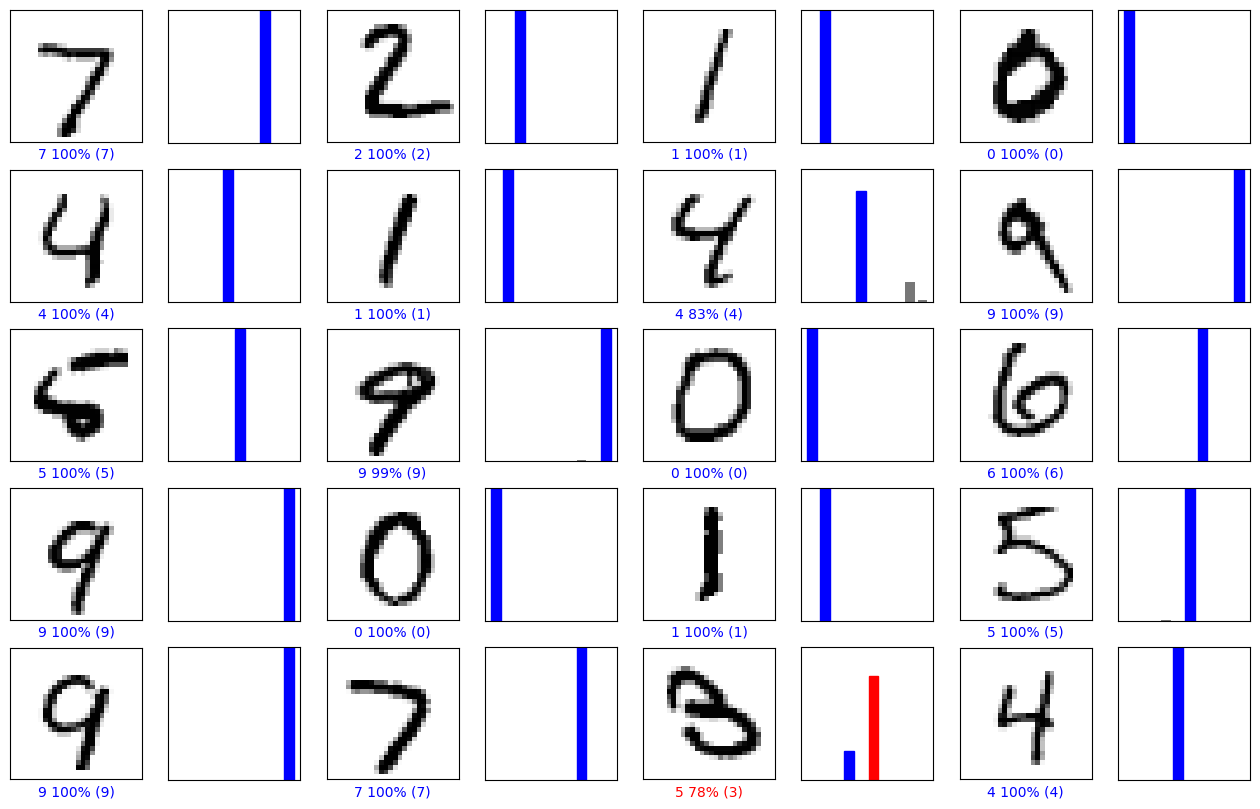

In [35]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
# 20 images in total
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  # places the image in an odd-numbered subplot position
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  # places the image in an even-numbered subplot position
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
comet_model_2.log_figure(figure=plt)
comet_model_2.end()
print(train_images.shape[0])

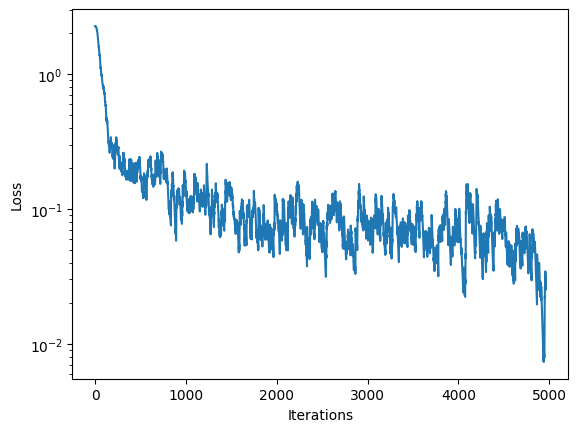

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:49<00:00, 29.43it/s]
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : important_raspberry_4236
COMET INFO:     url                   : https://www.comet.com/tnhi26990/6-s191lab2-part1-cnn2/875007e955334360ba22395f40dfe704
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000] : (1.162273565569194e-05, 2.3382041454315186)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename              

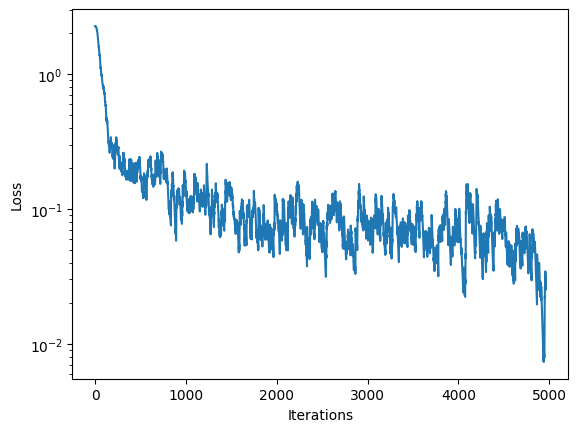

In [36]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

comet_ml.init(project_name="6.s191lab2_part1_CNN2")
comet_model_3 = comet_ml.Experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)): # iterations = train_images.shape[0]/batch_size
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    # feed the images into the model and obtain the predictions
    logits = cnn_model(images)

    # compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

    # log the loss to comet
    comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  # Use the tape to compute the gradient against all parameters in the CNN model.
  # Use cnn_model.trainable_variables to access these parameters
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

comet_model_3.log_figure(figure=plt)
comet_model_3.end()